**Imports:**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

**Downloading Dataset:**

In [6]:
! kaggle datasets download rakannimer/air-passengers

  0% 0.00/764 [00:00<?, ?B/s]
100% 764/764 [00:00<00:00, 538kB/s]


In [7]:
! unzip air-passengers.zip

Archive:  air-passengers.zip
  inflating: AirPassengers.csv       


In [9]:
data=pd.read_csv('/content/AirPassengers.csv')

In [26]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


**Plots:**

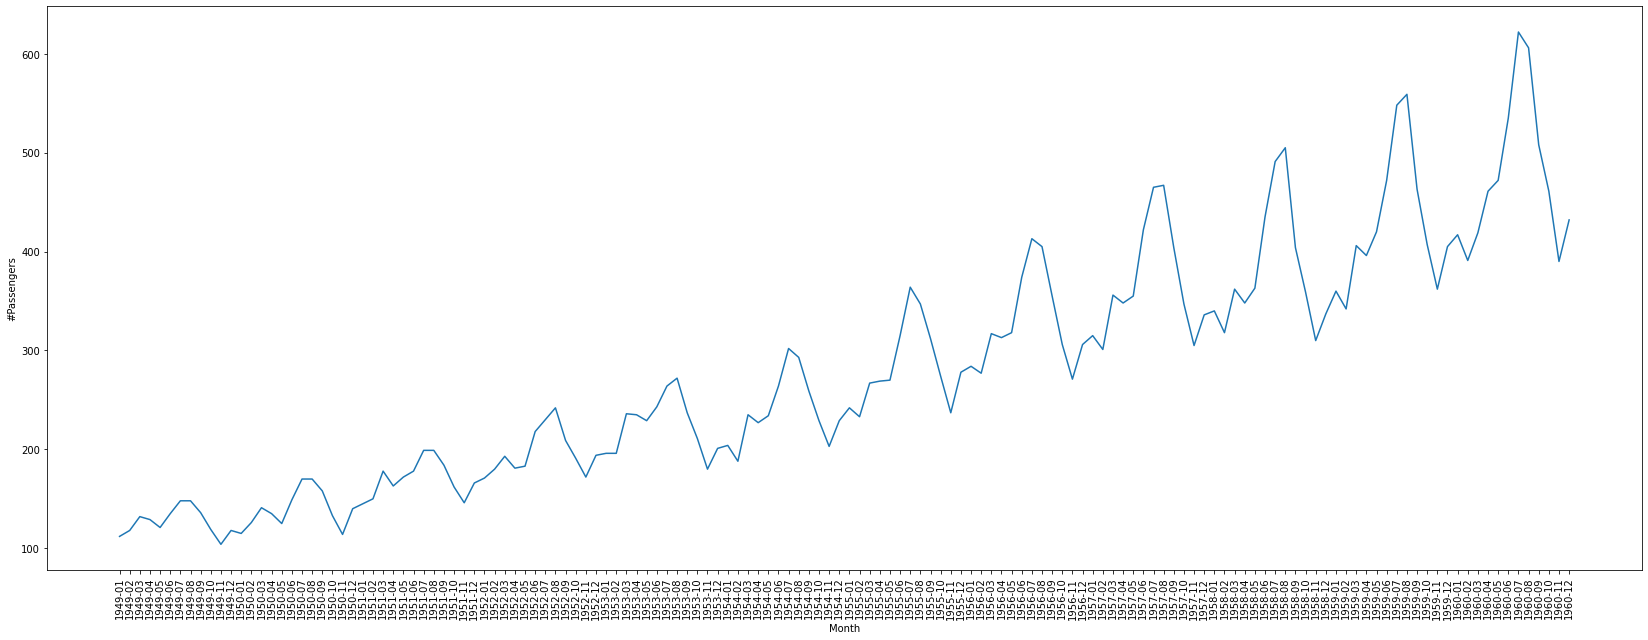

In [36]:
plt.figure(figsize=(23,9))

sns.lineplot(x='Month', y='#Passengers', data=data)

plt.tick_params(axis='x',labelsize=10,rotation=90)
plt.tight_layout()

plt.show()

In [25]:
ax=px.line(data,x='Month',y='#Passengers')
ax.show()

**Multiplicative Decomposition**

Seasonality increases over time

In [49]:
dateparser = lambda dates:pd.datetime.strptime(dates,'%Y-%m')

Pdata=pd.read_csv('/content/AirPassengers.csv',parse_dates=["Month"],index_col='Month',date_parser=dateparser)
TimeSeries=Pdata['#Passengers']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(TimeSeries, model="multiplicative")

**Trend x Seasonality x Residual**

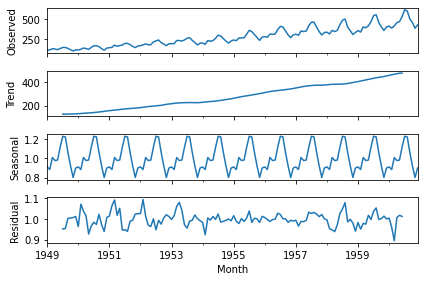

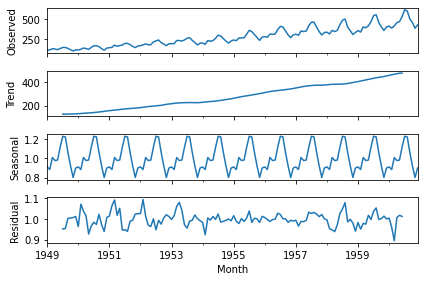

In [51]:
result.plot()

**Making TimeSeries Stationary through Differencing:**



**Stationary Time Series:**

Mean, Variance, Autocorrelation do not change significantly over the time period

In [62]:
Difference=data['#Passengers'].diff().dropna()

In [63]:
ax=px.line(Difference)
ax.show()

In [69]:
Difference2=Difference.diff().dropna()

**Dickey-Fuller Test:**

Null and Alternative Hypothesis which determines if a Time Series is stationary or not.

In [80]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(Difference)

In [78]:
def test(result): 
  output = pd.Series(result[0:4], index=['ADF Statistic','p-value','#Lags Used','Number of Observations Used'])
  print(output)

  for key,value in result[4].items():
    print('\t%s: %.3f'%(key,value))

  if result[0]<result[4]["5%"]:
     print("TS is Stationary")
  else:
     print("TS is not Stationary")    


In [81]:
test(result)

ADF Statistic                   -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
dtype: float64
	1%: -3.482
	5%: -2.884
	10%: -2.579
TS is not Stationary


**Differencing the Time Series again:**

In [82]:
Difference2=Difference.diff().dropna()
result=adfuller(Difference2)
test(result)

ADF Statistic                 -1.638423e+01
p-value                        2.732892e-29
#Lags Used                     1.100000e+01
Number of Observations Used    1.300000e+02
dtype: float64
	1%: -3.482
	5%: -2.884
	10%: -2.579
TS is Stationary


**ARIMA:**

**Auto-Regressive(p), Integrative(d), Moving Average(q)**

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



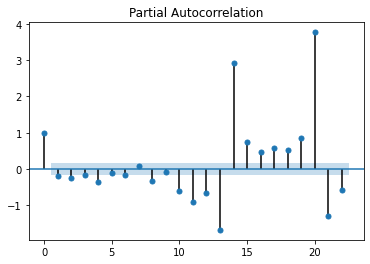

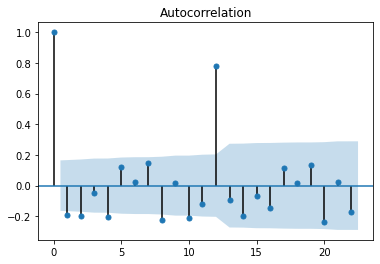

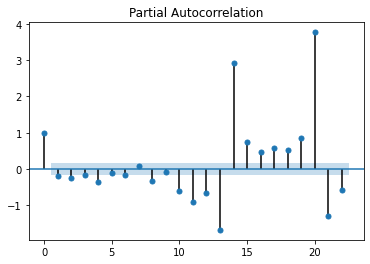

In [85]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Difference2)
plot_pacf(Difference2)

**Prediction:**

In [ ]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(data['#Passengers'], order=(7,1,7), seasonal_order=(1,1,1,12))  #Parameter combination found through conventional means and trial & error method

results=model.fit()

data['Prediction']=results.predict(start=100,end=145)
data[['#Passengers','Prediction']].plot(figsize=(20,8))

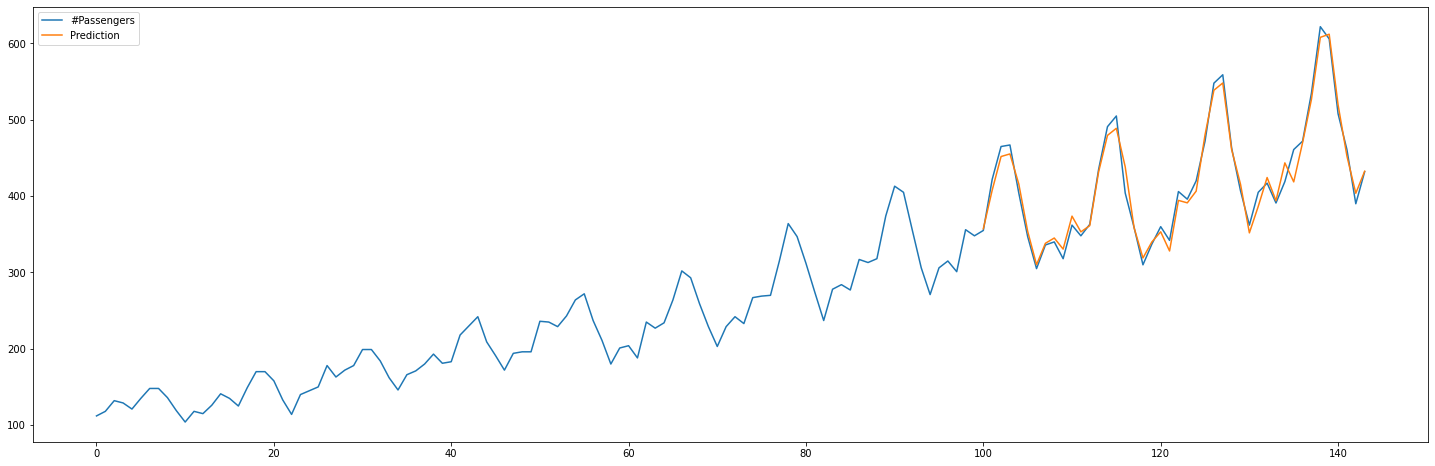

In [88]:
data[['#Passengers','Prediction']].plot(figsize=(25,8))